In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_pickle('./data/AgesAndHeights.pkl')
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [3]:
age = data['Age']
height = data['Height']

<Axes: >

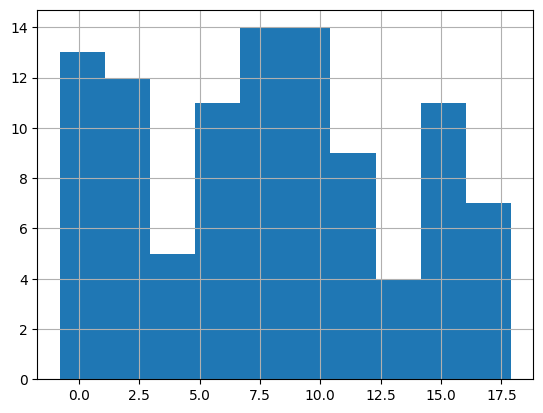

In [4]:
# Let's visualize the values of each column to get a little better insight about the dataset
age.hist()

In [5]:
# As we can see from the plot above the age column contains values less than zero which is un acceptable there for we need to truncate our data
data = data[data['Age'] > 0]

# Since Height in the data is given in (inches) and I wanted it to be in (cm) used the relationship [1 inch = 2.54 cm]
data['Height'] = data['Height'] * 2.54

/tmp/ipykernel_170784/50332178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Height'] = data['Height'] * 2.54


<Axes: >

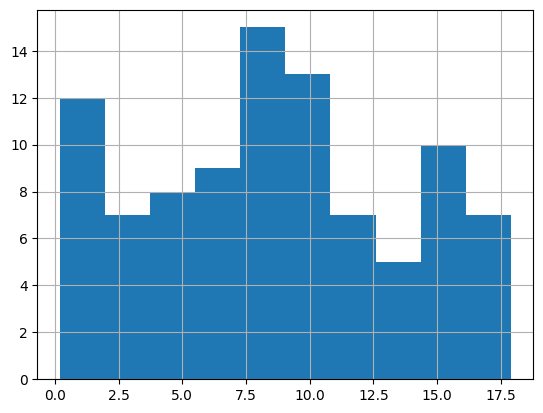

In [6]:
data['Age'].hist()

<Axes: >

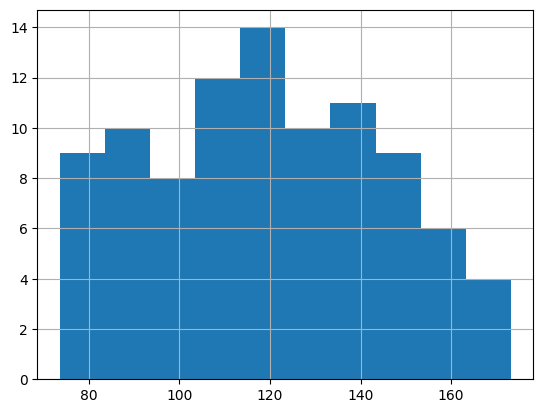

In [7]:
data['Height'].hist()

<Axes: xlabel='Age', ylabel='Height'>

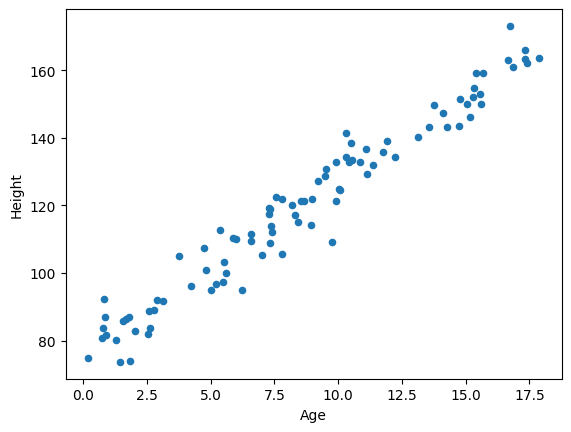

In [8]:
# To better know the relationship between the two variables we need to plot them in a scatter plot
data.plot.scatter(x='Age', y='Height')

In [9]:
ages = data['Age']
heights = data['Height']

fig = px.scatter(x=ages, y=heights, title="Height Vs Age of People", labels={'x': 'Age(Years)', 'y':'Height'})

fig.show()

In [10]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

In [13]:
ages_np_reshaped = ages_np.reshape(len(ages), 1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [15]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

array([5.08359892])

In [16]:
# Let's plot the models out put along with the earlier dataset's scatter plot
x_new = np.array(list(range(19))).reshape(19, 1)

In [17]:
preds = model.predict(x_new)

In [18]:
fig = px.scatter(x=ages, y=heights, title="Height Vs Age of People", labels={'x': 'Age(Years)', 'y':'Height'})

fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name="Model"))
fig.show()